In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import os
from IPython.core.interactiveshell import InteractiveShell
import lifelines as ll
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df = pd.get_dummies(data=df, columns=['gender'])
df['Partner'] = df['Partner'].map(lambda s :1  if s =='Yes' else 0)
df['Dependents'] = df['Dependents'].map(lambda s :1  if s =='Yes' else 0)
df['PhoneService'] = df['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)
df = pd.get_dummies(data=df, columns=['MultipleLines'])
df = pd.get_dummies(data=df, columns=['InternetService'])
df['OnlineSecurity'] = df['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
df['OnlineBackup'] = df['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
df['DeviceProtection'] = df['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
df['TechSupport'] = df['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
df['StreamingTV'] = df['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
df['StreamingMovies'] = df['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0) 
df = pd.get_dummies(data=df, columns=['PaymentMethod']) 
df = pd.get_dummies(data=df, columns=['Contract']) 

In [8]:
df = df[df['TotalCharges'] != " "]
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [9]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,No,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,No,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,Yes,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,No,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,Yes,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
5,9305-CDSKC,0,0,0,8,1,0,0,1,0,1,1,1,99.65,820.50,Yes,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
6,1452-KIOVK,0,0,1,22,1,0,1,0,0,1,0,1,89.10,1949.40,No,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
7,6713-OKOMC,0,0,0,10,0,1,0,0,0,0,0,0,29.75,301.90,No,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0
8,7892-POOKP,0,1,0,28,1,0,0,1,1,1,1,1,104.80,3046.05,Yes,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
9,6388-TABGU,0,0,1,62,1,1,1,0,0,0,0,0,56.15,3487.95,No,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
customerID                                 7032 non-null object
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
tenure                                     7032 non-null int64
PhoneService                               7032 non-null int64
OnlineSecurity                             7032 non-null int64
OnlineBackup                               7032 non-null int64
DeviceProtection                           7032 non-null int64
TechSupport                                7032 non-null int64
StreamingTV                                7032 non-null int64
StreamingMovies                            7032 non-null int64
PaperlessBilling                           7032 non-null int64
MonthlyCharges                             7032 non-null float64
TotalCha

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [12]:
class Data:
    def __init__(self, columns, label, df = df, seed=42):
        data = df[columns + label].dropna()
        X = data[columns]
        y = data[label[0]]
        
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        self.X, self.y = x_train, y_train
        self.vX, self.vy = x_test, y_test
    
    def train(self):
        return self.X, self.y
    
    def valid(self):
        return self.vX, self.vy

In [13]:
def tuning(estimator, X, label, grid, one_by_one=False):
    
    data=Data(X, label)
    
    if one_by_one:
        extra_cl_random = GridSearchCV(estimator=estimator, param_grid=grid)
        
    else:
        extra_cl_random = RandomizedSearchCV(estimator=estimator, param_distributions=grid, n_iter=500, cv=3)
    
    extra_cl_random.fit(*data.train())
        
    best = extra_cl_random.best_estimator_
    tscore = best.score(*data.train())
    vscore = best.score(*data.valid())
    params = best.get_params()
    
    print('vscore:', vscore)
    print('best_params:', params) 

In [14]:
label = ['Churn']
columns = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
          'PaperlessBilling', 'MonthlyCharges', 'TotalCharges','gender_Female','gender_Male','MultipleLines_No',
          'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 
          'InternetService_No', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
          'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Contract_Month-to-month', 'Contract_One year',
          'Contract_Two year'] 

In [15]:
def knn(X, labels,**knn_params): 
    data = Data(X,labels)
    neigh = KNeighborsClassifier(**knn_params)
    neigh.fit(*data.train())
    score_train = neigh.score(*data.train())
    score = neigh.score(*data.valid())
    
    print('accuracy:', (score_train, score)) 
    
    return neigh, data, score_train, score

In [16]:
def xgboost(columns, label, **xg_params):
    
    data = Data(columns, label)
    xgb = GradientBoostingClassifier(**xg_params)
    xgb.fit(*data.train())
    vscore = xgb.score(*data.valid())
   
    #mse = mean_squared_error(*data.valid())
    
    return vscore

# Random Forest Classifier

In [17]:
def rfc(columns, labels, **rfc_params):
    
    data = Data(columns, labels)
    
    rfc = RandomForestClassifier(**rfc_params)
    rfc.fit(*data.train())
    
    tscore = rfc.score(*data.train())
    vscore = rfc.score(*data.valid())
    
    print("final tscore=%g vscore=%g" % (tscore, vscore))
    
    return rfc, data, tscore, vscore

In [17]:
rfc_, data, tscore, vscore = rfc(columns, label, n_estimators=100, criterion='gini', max_depth=None,
                                     min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False,
                                     n_jobs=1, random_state=42)

final tscore=0.956522 vscore=0.790995


In [18]:
y_true = np.ravel(data.vy)
y_pred = np.ravel(rfc_.predict(data.vX))
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1
0,1386,163
1,278,283


In [19]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(10, 300, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10] 
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']
random_state = [100]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               'random_state': random_state}

In [ ]:
tuning(RandomForestClassifier(), columns, label, random_grid) 

# MLP

In [25]:
def mlpc(columns, labels, **mlp_params):
    
    data = Data(columns, labels)

    mlperc = MLPClassifier(**mlp_params)
    max_iter = mlp_params.pop('max_iter')
    
    tscores = []
    vscores = []
    
    for epoch in range(max_iter):
        
        mlperc.set_params(max_iter=epoch+1)
        mlperc.fit(*data.train())
        
        tscore = mlperc.score(*data.train())
        vscore = mlperc.score(*data.valid())
        
        loss = mlperc.loss_
        tscores.append(tscore)
        vscores.append(vscore)
        
        mlperc.set_params(warm_start=True) 
    
    print("final tscore=%g vscore=%g" % (tscore, vscore))
    
    return mlperc, data, tscores, vscores

In [26]:
mlp, data, tscores, vscores = mlpc(columns, label, max_iter=1000, hidden_layer_sizes = (200,),
                                       batch_size = 110, learning_rate_init=1e-1, solver = 'adam',
                                       learning_rate = 'constant', momentum = 0.0, nesterovs_momentum = False,
                                       verbose = False, alpha=0.0, tol = -1)

C:\Users\giamm\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


final tscore=0.734254 vscore=0.734123


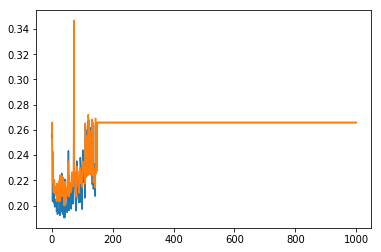

In [27]:
plt.plot(range(len(tscores)), 1-np.array(tscores), range(len(vscores)), 1-np.array(vscores));

# KNN

In [22]:
neigh, data, score_train, score = knn(columns, label, weights='distance') 

accuracy: (0.9985778138967899, 0.7635071090047393)


In [23]:
y_true = np.ravel(data.vy)
y_pred = np.ravel(neigh.predict(data.vX))
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1
0,1354,195
1,304,257


# XGB

In [37]:
xgboost(columns, label, random_state=42) 

0.7976303317535545

# Survival Analysis

In [25]:
df = df[df.tenure != 0]
df['Churn'] = df['Churn'].map(lambda s :1  if s =='Yes' else 0)

In [40]:
def plot_surv_weibull(weibull_model, ax, max_time = 120):
    max_time = np.floor(max_time).astype(int)
    x = np.array(range(max_time))
    y = np.exp(-(weibull_model.lambda_*x)**weibull_model.rho_)
    ax.plot(x,y, label = weibull_model._label)
    plt.legend()

<lifelines.WeibullFitter: fitted with 7032 observations, 5163 censored>

Text(0.5,1,"Survival Curve of Telco's Customers")

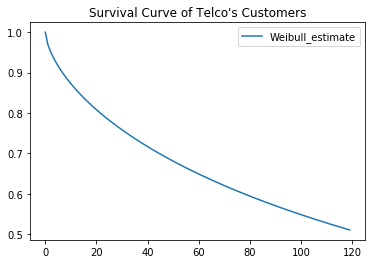

In [41]:
weib = ll.WeibullFitter()
weib.fit(durations = df.tenure, event_observed = df.Churn)
ax = plt.subplot(111)
plot_surv_weibull(weib, ax)
plt.title("Survival Curve of Telco's Customers")


In [31]:
from lifelines import KaplanMeierFitter

<lifelines.KaplanMeierFitter: fitted with 7032 observations, 5163 censored>

Text(0.5,1,"Survival curve of Telco's customers")

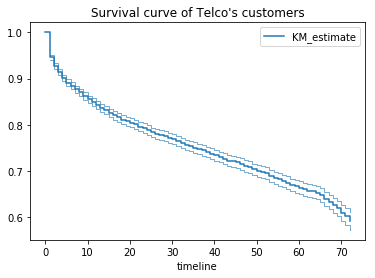

In [37]:
#Survival curve (Keplen Meier model) with confidence intervals (Greenwood exponential confidence intervals)
ax = plt.subplot(111)
kmf = KaplanMeierFitter()
kmf.fit(durations = df.tenure, event_observed = df.Churn) 
kmf.plot(ax=ax, ci_force_lines=True)
plt.title("Survival curve of Telco's customers")

### Comparison between variables (segmentation)

<lifelines.KaplanMeierFitter: fitted with 3549 observations, 2619 censored>

<lifelines.KaplanMeierFitter: fitted with 3483 observations, 2544 censored>

Text(0.5,1,'Male vs Female Survival Curve')

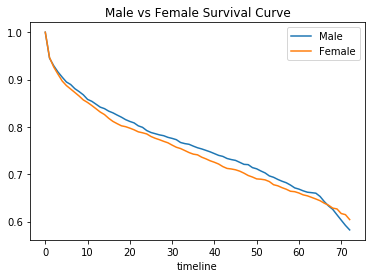

In [59]:
axes = plt.subplot(111)
kmf_male = ll.KaplanMeierFitter()
kmf_female = ll.KaplanMeierFitter()

is_male = (df['gender_Male'] == 1)
kmf_male.fit(durations = df.tenure[is_male], event_observed = df.Churn[is_male], label = "Male")
#kmf_male.plot(ax=axes[0][0], ci_force_lines=False)
kmf_male.survival_function_.plot(ax = axes)
kmf_female.fit(durations = df.tenure[~is_male], event_observed = df.Churn[~is_male], label = "Female")
#kmf_female.plot(ax=axes[0][0], ci_force_lines=False)
kmf_female.survival_function_.plot(ax = axes) 

plt.title("Male vs Female Survival Curve")

<lifelines.KaplanMeierFitter: fitted with 1716 observations, 1310 censored>

<lifelines.KaplanMeierFitter: fitted with 5316 observations, 3853 censored>

Text(0.5,1,'Conds vs Non_Conds Survival Curve')

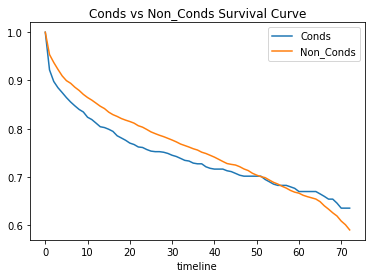

In [69]:
#Testing multiple conditions (segmentation) 
is_male = ((df['gender_Male'] == 1) & (df['MultipleLines_No'] == 1))
axes = plt.subplot(111)
kmf_conds = ll.KaplanMeierFitter()
kmf_non_conds = ll.KaplanMeierFitter()

conds = ((df['gender_Male'] == 1) & (df['MultipleLines_No'] == 1))
kmf_conds.fit(durations = df.tenure[conds], event_observed = df.Churn[conds], label = "Conds")
kmf_conds.survival_function_.plot(ax = axes)
kmf_non_conds.fit(durations = df.tenure[~conds], event_observed = df.Churn[~conds], label = "Non_Conds")
kmf_non_conds.survival_function_.plot(ax = axes) 

plt.title("Conds vs Non_Conds Survival Curve")